## 1 part 5 part a

Text(0, 0.5, 'true positive rate')

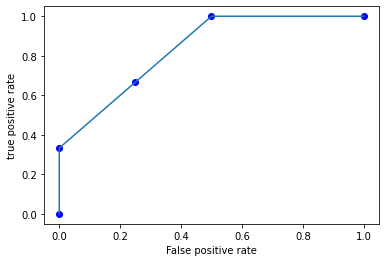

In [1]:
import matplotlib.pyplot as plt
fpr=[0,0,1/4,2/4,1]
tpr=[0,2/6,4/6,6/6,1]
plt.plot(fpr,tpr,"bo")
plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("true positive rate")

## 2 part 1

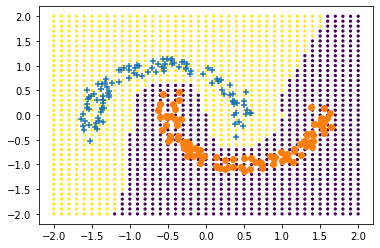

In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

df = np.array(pd.read_csv('data\D2z.txt', sep='\s+', header=None))
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(df[:,0:2],df[:,2])

grid=np.column_stack((np.meshgrid(np.linspace(-2, 2, num=41), np.linspace(-2, 2, num=41))[0].ravel(), np.meshgrid(np.linspace(-2, 2, num=41), np.linspace(-2, 2, num=41))[1].ravel()))

pred=knn.predict(grid)
plt.scatter(grid[:,0],grid[:,1],c=pred,s=5)
plt.scatter(df[df[:,2]==1][:,0],df[df[:,2]==1][:,1],marker='+')
plt.scatter(df[df[:,2]==0][:,0],df[df[:,2]==0][:,1],marker='o')


# 2 part 2

In [3]:
from sklearn.model_selection import cross_val_score

df = pd.read_csv('data\emails.csv')
knn_cv = KNeighborsClassifier(n_neighbors=1)
accuracy = cross_val_score(knn_cv,df.iloc[:, 1:-1].values,df.iloc[:, -1].values, cv=5)
#print each cv score (accuracy) and average them
print('Accuracy',accuracy)
recall = cross_val_score(knn_cv,df.iloc[:, 1:-1].values,df.iloc[:, -1].values, cv=5, scoring='recall')
print('Recall', recall)
precision = cross_val_score(knn_cv,df.iloc[:, 1:-1].values,df.iloc[:, -1].values, cv=5, scoring='precision')
print('Precision', precision)

Accuracy [0.826 0.851 0.866 0.859 0.777]
Recall [0.8200692  0.86851211 0.83391003 0.82352941 0.76551724]
Precision [0.66016713 0.69337017 0.73700306 0.72560976 0.58885942]


## 2 part 3

In [6]:
from sklearn.metrics import recall_score, precision_score,accuracy_score

def sig(z):
        return 1/(1 + np.exp(-z))

def fit(X, Y, X_test):
    num_samp= X.shape[0]
    num_feat= X.shape[1]
    weights=np.zeros(num_feat)
    for i in range(num_steps):
        y=sig(X@weights)
        grad=X.T@(y-Y)/num_samp
        weights=weights-lr*grad 
    y_pred=sig(X_test@weights)
    y_pred=np.where(y_pred >= 0.5, 1, 0)
    return y_pred


lr=.02
num_steps=100
X=df.iloc[:, 1:-1].values
y=df.iloc[:, -1].values
X1_train=X[1001:5000,:]
X1_test=X[0:1000,:]
X2_train=np.append(X[0:1000,:],X[2001:5000,:],axis=0)
X2_test=X[1000:2000,:]
X3_train=np.append(X[0:2000,:],X[3001:5000,:],axis=0)
X3_test=X[2000:3000,:]
X4_train=np.append(X[0:3000,:],X[4001:5000,:],axis=0)
X4_test=X[3000:4000,:]
X5_train=X[0:4000,:]
X5_test=X[4000:5000,:]
y1_train=y[1001:5000]
y1_test=y[0:1000]
y2_train=np.append(y[0:1000],y[2001:5000],axis=0)
y2_test=y[1000:2000]
y3_train=np.append(y[0:2000],y[3001:5000],axis=0)
y3_test=y[2000:3000]
y4_train=np.append(y[0:3000],y[4001:5000],axis=0)
y4_test=y[3000:4000]
y5_train=y[0:4000]
y5_test=y[4000:5000]
y1_pred=fit(X1_train,y1_train,X1_test)
y2_pred=fit(X2_train,y2_train,X2_test)
y3_pred=fit(X3_train,y3_train,X3_test)
y4_pred=fit(X4_train,y4_train,X4_test)
y5_pred=fit(X5_train,y5_train,X5_test)
print("recall",recall_score(y1_test, y1_pred),recall_score(y2_test, y2_pred),recall_score(y3_test, y3_pred),recall_score(y4_test, y4_pred),recall_score(y5_test, y5_pred))
print("precision",precision_score(y1_test, y1_pred),precision_score(y2_test, y2_pred),precision_score(y3_test, y3_pred),precision_score(y4_test, y4_pred),precision_score(y5_test, y5_pred))
print("accuracy",accuracy_score(y1_test, y1_pred),accuracy_score(y2_test, y2_pred),accuracy_score(y3_test, y3_pred),accuracy_score(y4_test, y4_pred),accuracy_score(y5_test, y5_pred))

c:\users\riley fischer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


recall 0.10877192982456141 0.8953068592057761 0.8450704225352113 0.9149659863945578 0.08496732026143791
precision 0.8157894736842105 0.46616541353383456 0.5298013245033113 0.5699152542372882 0.6046511627906976
accuracy 0.739 0.687 0.743 0.772 0.703


## 2 part 4

[[ 1.      0.8358]
 [ 3.      0.852 ]
 [ 5.      0.8446]
 [ 7.      0.8464]
 [10.      0.856 ]]


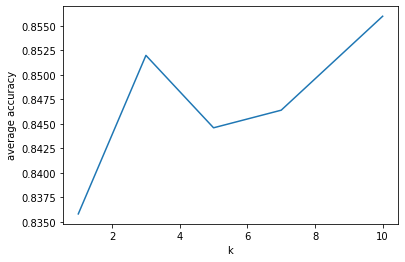

In [7]:
knn_cv = KNeighborsClassifier(n_neighbors=1)
accuracy1 = np.mean(cross_val_score(knn_cv,df.iloc[:, 1:-1].values,df.iloc[:, -1].values, cv=5))
knn_cv = KNeighborsClassifier(n_neighbors=4)
accuracy3 = np.mean(cross_val_score(knn_cv,df.iloc[:, 1:-1].values,df.iloc[:, -1].values, cv=5))
knn_cv = KNeighborsClassifier(n_neighbors=5)
accuracy5 = np.mean(cross_val_score(knn_cv,df.iloc[:, 1:-1].values,df.iloc[:, -1].values, cv=5))
knn_cv = KNeighborsClassifier(n_neighbors=7)
accuracy7 = np.mean(cross_val_score(knn_cv,df.iloc[:, 1:-1].values,df.iloc[:, -1].values, cv=5))
knn_cv = KNeighborsClassifier(n_neighbors=10)
accuracy10 = np.mean(cross_val_score(knn_cv,df.iloc[:, 1:-1].values,df.iloc[:, -1].values, cv=5))

score=np.array([[1,accuracy1],[3,accuracy3],[5,accuracy5],[7,accuracy7],[10,accuracy10]])
plt.plot(score[:,0],score[:,1])
plt.xlabel("k")
plt.ylabel("average accuracy")
print(score)

## 2 part 5

c:\users\riley fischer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


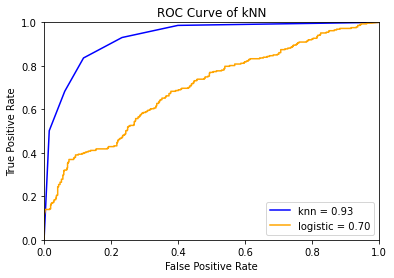

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split


def fit_logistic(X, Y, X_test):
    num_samp= X.shape[0]
    num_feat= X.shape[1]
    weights=np.zeros(num_feat)
    for i in range(num_steps):
        y=sig(X@weights)
        grad=X.T@(y-Y)/num_samp
        weights=weights-lr*grad 
    y_pred=sig(X_test@weights)
    #y_pred=np.where(y_pred >= 0.5, 1, 0)removed to get probability instead of predicted value
    return y_pred


X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:-1].values, df.iloc[:, -1].values, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'knn = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')

y_scores = fit_logistic(X_train, y_train,X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'logistic = %0.2f' % roc_auc,color='orange')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()